# Notebook to make the paper plots for step 3-FeatureSelection

This notebook allow researchers to reproduce the paper plots for step 3-FeatureSelection, plus identify the best choice for this step.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json


def harmonic(p,r):
    
    return 0 if p == 0 or r == 0 else (2 * p * r) / (p + r)

Best = -1
BestA = -1
BestF = -1

for Performance in range(1,286):
    
    df = pd.read_csv("3-FeatureSelection/CV_%d-mlp.csv"%Performance,sep=";")
    df['armonicF'] = df.apply(lambda row: (harmonic(row['D1R-F1'],row['D2R-F1'])), axis=1) 
    df['armonicA'] = df.apply(lambda row: (harmonic(row['D1Accuracy'],row['D2Accuracy'])), axis=1) 
    df['armonicG'] = df.apply(lambda row: (harmonic(row['D1G-F1'],row['D2G-F1'])), axis=1) 
    df['armonicY'] = df.apply(lambda row: (harmonic(row['D1Y-F1'],row['D2Y-F1'])), axis=1) 

    Sorted_DF = df.sort_values(['armonicF', 'armonicA'], ascending=[False, False])

    
    BestF1G = float(Sorted_DF['armonicG'].iloc[0])
    BestF1Y = float(Sorted_DF['armonicY'].iloc[0])
    BestF1R = float(Sorted_DF['armonicF'].iloc[0])
    BestAccuracy = float(Sorted_DF['armonicA'].iloc[0])
    if(BestF1R>Best):
        Best = BestF1R
        BestA = BestAccuracy
        BestF = Performance
    Data["Features"].append(Performance)
    Data["FRed"].append(BestF1R)
    Data["FYellow"].append(BestF1Y)
    Data["FGreen"].append(BestF1G)
    Data["Accuracy"].append(BestAccuracy)



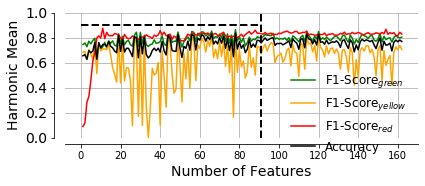

In [120]:
fig, ax = plt.subplots(figsize=(6,2.7)) 
ax.plot(Data["Features"],Data["FGreen"], color = "green", label = "F1-Score$_{green}$")
ax.plot(Data["Features"],Data["FYellow"], color = "orange", label = "F1-Score$_{yellow}$")
ax.plot(Data["Features"],Data["FRed"], color = "red", label = "F1-Score$_{red}$")
ax.plot(Data["Features"],Data["Accuracy"], color = "black", label = "Accuracy")
ax.legend(ncol=1,frameon=False,fontsize=12,bbox_to_anchor=(0.61, 0.6))


ax.plot([0,BestF],[Best,Best], color='k', linestyle='--',linewidth=2)

ax.plot([BestF,BestF],[0,1], color='k', linestyle='--',linewidth=2)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.03))

ax.set_xlabel("Number of Features",fontsize=14)
ax.set_ylabel("Harmonic Mean",fontsize=14)
plt.yticks([float(i)/10 for i in range(0,11,2)],fontsize=14)
ax.set_ylim(0,1)
#ax.set_xlim(0,287)
plt.grid()
plt.tight_layout()
plt.savefig("fig/CV_FeatureSelection.pdf")
plt.show()

print(BestF,"%.2f"%Best,"%.2f"%BestA)

